In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import time
from datetime import timedelta
import math
import os

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(type(x_train))
y_train = y_train.flatten()
y_test = y_test.flatten()
print("Train:", x_train.shape, y_train.shape)
print("Test:",x_test.shape, y_test.shape)

<class 'numpy.ndarray'>
Train: (50000, 32, 32, 3) (50000,)
Test: (10000, 32, 32, 3) (10000,)


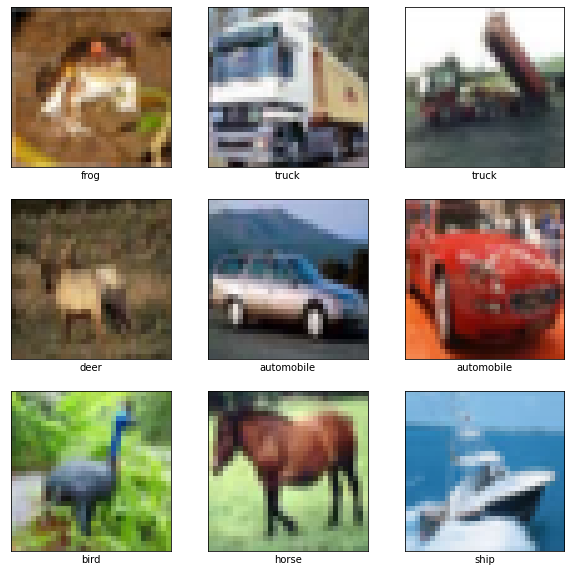

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_train[i]])
plt.show()

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[0]

6

## Custom Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 352s 225ms/step - loss: 0.7204 - accuracy: 0.7466 - val_loss: 1.1215 - val_accuracy: 0.6366
Epoch 2/10
1563/1563 [==============================] - 389s 249ms/step - loss: 0.6893 - accuracy: 0.7580 - val_loss: 1.0981 - val_accuracy: 0.6509
Epoch 3/10
1563/1563 [==============================] - 384s 246ms/step - loss: 0.6657 - accuracy: 0.7670 - val_loss: 1.0864 - val_accuracy: 0.6638
Epoch 4/10
1563/1563 [==============================] - 369s 236ms/step - loss: 0.6377 - accuracy: 0.7762 - val_loss: 1.1090 - val_accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 382s 245ms/step - loss: 0.6147 - accuracy: 0.7856 - val_loss: 1.1832 - val_accuracy: 0.6551
Epoch 6/10
 152/1563 [=>............................] - ETA: 5:22 - loss: 0.5408 - accuracy: 0.8049

KeyboardInterrupt: ignored

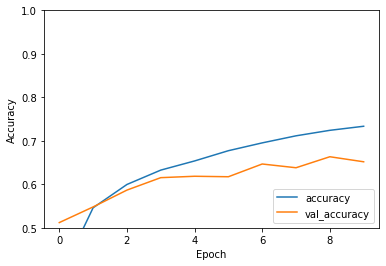

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.1799 - accuracy: 0.6568


### Confusion Matrices

In [ ]:
# referencing https://www.kaggle.com/adi160/cifar-10-keras-transfer-learning
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
predictions = model.predict(x_test)
y_pred = [np.argmax(probs) for probs in predictions]
print(y_test[:10])
print(y_pred[:10])
confusion = confusion_matrix(y_test, y_pred)
confusion

[3 8 8 0 6 6 1 6 3 1]
[5, 8, 8, 0, 6, 6, 1, 2, 3, 1]


array([[663,  18,  43,  31,  21,   5,   8,  12, 155,  44],
       [ 17, 786,   6,   7,   1,   4,   3,   1,  64, 111],
       [ 90,   8, 539,  69,  82,  77,  51,  44,  31,   9],
       [ 20,  15,  60, 454,  54, 225,  59,  56,  31,  26],
       [ 35,   4, 107,  76, 564,  43,  58,  84,  20,   9],
       [ 20,   8,  54, 181,  42, 577,  22,  68,  18,  10],
       [  9,  12,  50,  61,  53,  54, 727,   7,  17,  10],
       [ 24,  16,  41,  41,  59,  78,   7, 694,  12,  28],
       [ 56,  35,  14,  14,   3,   6,   6,   5, 828,  33],
       [ 32, 116,   9,  12,   6,   6,   7,  15,  61, 736]])

Confusion matrix, without normalization


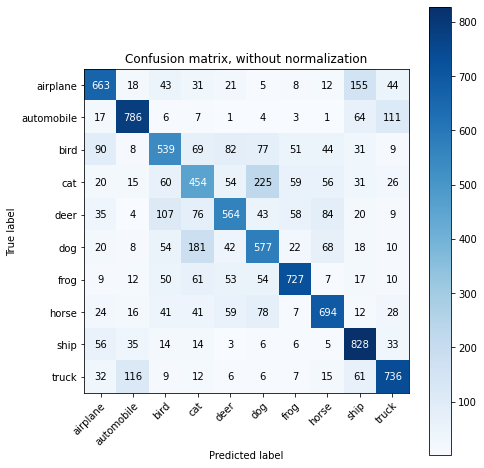

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


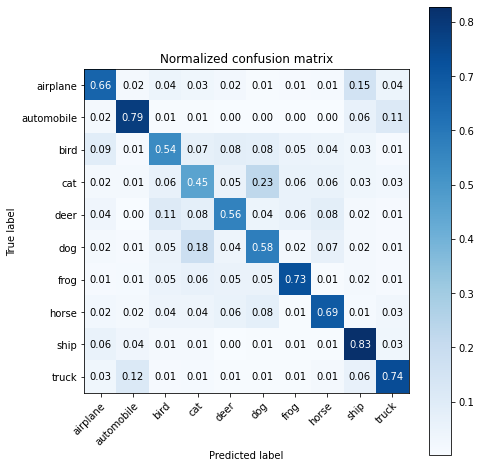

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

### Grad-Cam

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

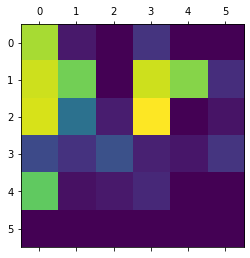

In [ ]:
# Generate class activation heatmap
idx = 7
heatmap = make_gradcam_heatmap(x_test, model, "conv2d_2", pred_index=idx)

# Display heatmap
plt.matshow(heatmap)
plt.show()

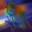

Prediction:  bird
Ground Truth: frog


In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.6):
    # Load the original image
    img = tf.keras.preprocessing.image.img_to_array(img_path)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path, height=224, width=224))


save_and_display_gradcam(x_test[idx], heatmap)
print("Prediction: ", classes[y_pred[idx]])
print("Ground Truth:", classes[y_test[idx]])

## Transfer Learning with MobileNetV2

In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(32, 32, 3), weights="imagenet", include_top=False)

base_model.trainable = False

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(10, activation="softmax")(avg)
mobile_model = tf.keras.Model(inputs=base_model.input, outputs=output)

mobile_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0005), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
mobile_history = mobile_model.fit(x_train, y_train, validation_split=.12, epochs=5)

Epoch 1/5
1375/1375 [==============================] - 63s 42ms/step - loss: 2.2166 - accuracy: 0.1757 - val_loss: 2.1690 - val_accuracy: 0.2045
Epoch 2/5
1375/1375 [==============================] - 57s 41ms/step - loss: 2.1571 - accuracy: 0.2083 - val_loss: 2.1404 - val_accuracy: 0.2127
Epoch 3/5
1375/1375 [==============================] - 57s 41ms/step - loss: 2.1356 - accuracy: 0.2186 - val_loss: 2.1270 - val_accuracy: 0.2155
Epoch 4/5
1375/1375 [==============================] - 57s 41ms/step - loss: 2.1237 - accuracy: 0.2227 - val_loss: 2.1187 - val_accuracy: 0.2180
Epoch 5/5
1375/1375 [==============================] - 53s 39ms/step - loss: 2.1161 - accuracy: 0.2248 - val_loss: 2.1146 - val_accuracy: 0.2222


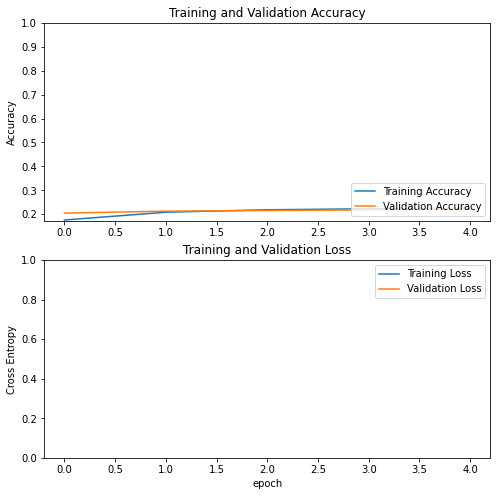

In [ ]:
acc = mobile_history.history['accuracy']
val_acc = mobile_history.history['val_accuracy']

loss = mobile_history.history['loss']
val_loss = mobile_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()